# EN3160 Assignment 3 on Neural Networks

### 210293K | Kodikara U. S. S.

Github Repo Link : 

## Question 01

This is the listing one code without any change and I got training accuracy: 32.24% and test accuracy: 32.40%.

100%|██████████| 170498071/170498071 [03:25<00:00, 828167.77it/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/20, Loss: 0.9768685227632523
Epoch 2/20, Loss: 0.9498063517808915
Epoch 3/20, Loss: 0.9360822765231133
Epoch 4/20, Loss: 0.9275424647331237
Epoch 5/20, Loss: 0.9216067668795586
Epoch 6/20, Loss: 0.9172037612199784
Epoch 7/20, Loss: 0.9137920534014702
Epoch 8/20, Loss: 0.9110652595758438
Epoch 9/20, Loss: 0.9088360525369644
Epoch 10/20, Loss: 0.9069835203886032
Epoch 11/20, Loss: 0.9054233641624451
Epoch 12/20, Loss: 0.9040956642627717
Epoch 13/20, Loss: 0.9029570129513741
Epoch 14/20, Loss: 0.9019736434221268
Epoch 15/20, Loss: 0.9011196796894073
Epoch 16/20, Loss: 0.9003747349381447
Epoch 17/20, Loss: 0.8997220999002457
Epoch 18/20, Loss: 0.8991486614346504
Epoch 19/20, Loss: 0.8986431407928467
Epoch 20/20, Loss: 0.8981965827345848


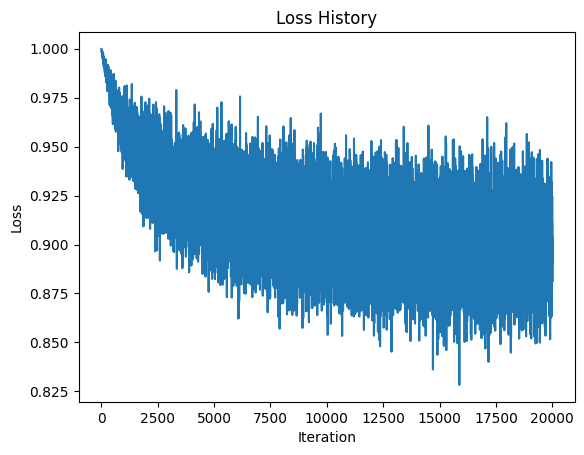

Training accuracy: 32.24%
Test accuracy: 32.40%


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5
# Initialize weights and biases
w = torch.randn(Din, K) * std  # One layer: directly map input to output
b = torch.zeros(K)
# Hyperparameters
iterations = 20
lr = 2e-6  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot encoding

        # Forward pass
        y_pred = x_train.mm(w) + b  # Output layer activation

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * torch.sum(w ** 2)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)

        # Parameter update
        w -= lr * dw
        b -= lr * db

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_onehot = nn.functional.one_hot(labels, K).float()

        # Forward pass
        y_train_pred = x_train.mm(w) + b
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn.functional.one_hot(labels, K).float()

        # Forward pass
        y_test_pred = x_test.mm(w) + b
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


I manually calculated the Cross entropy loss and other mentioned changes. Then managed to get an accuracy of 10%.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 2.302752699613571
Epoch 2/10, Loss: 2.3027626090049744
Epoch 3/10, Loss: 2.3027480022907256
Epoch 4/10, Loss: 2.3027580525875093
Epoch 5/10, Loss: 2.302757177114487
Epoch 6/10, Loss: 2.3027512843608857
Epoch 7/10, Loss: 2.302759957075119
Epoch 8/10, Loss: 2.3027426669597624
Epoch 9/10, Loss: 2.3027719473838806
Epoch 10/10, Loss: 2.3027070705890655


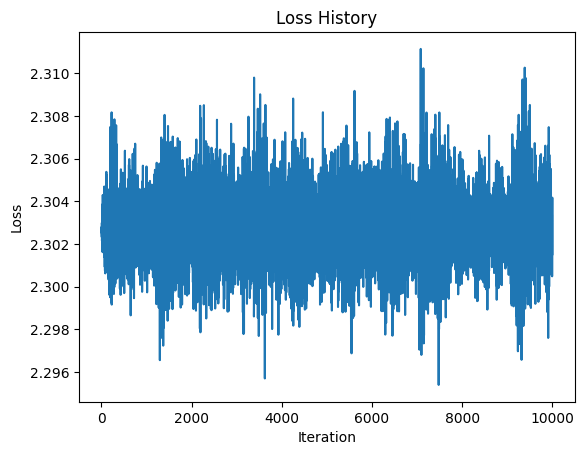

Training accuracy: 10.00%
Test accuracy: 10.00%


In [6]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100  # Hidden layer size (new layer with 100 nodes)
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases for the two layers
w1 = torch.randn(Din, H) * std  # Weights from input layer to hidden layer
b1 = torch.zeros(H)             # Biases for the hidden layer
w2 = torch.randn(H, K) * std    # Weights from hidden layer to output layer
b2 = torch.zeros(K)             # Biases for the output layer

# Hyperparameters
iterations = 10  # Run the network for 10 epochs
lr = 0.001  # Learning rate
reg = 0  # Regularization strength
loss_history = []

# Function to manually compute cross-entropy loss with softmax
def manual_cross_entropy_loss(logits, labels):
    # Apply softmax to get probabilities
    probs = torch.exp(logits) / torch.exp(logits).sum(dim=1, keepdim=True)
    
    # Select the log-probabilities of the true class labels
    true_class_probs = probs[range(len(labels)), labels]
    
    # Compute the negative log likelihood
    loss = -torch.log(true_class_probs).mean()
    
    return loss

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.view(inputs.size(0), -1)  # Flatten the inputs

        # Forward pass
        z1 = inputs.mm(w1) + b1
        h1 = torch.sigmoid(z1)
        logits = h1.mm(w2) + b2

        # Compute Manual Cross-Entropy Loss
        loss = manual_cross_entropy_loss(logits, labels)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        # Calculate gradients for cross-entropy loss
        probs = torch.exp(logits) / torch.exp(logits).sum(dim=1, keepdim=True)
        probs[range(len(labels)), labels] -= 1  # Subtract 1 for the true class (cross-entropy derivative)
        dy_pred = probs / len(labels)  # Scale gradient by batch size

        # Gradients for w2 and b2
        dw2 = h1.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)

        # Backprop through the hidden layer
        dh1 = dy_pred.mm(w2.t())
        dz1 = dh1 * h1 * (1 - h1)  # Sigmoid derivative

        # Gradients for w1 and b1
        dw1 = inputs.t().mm(dz1) + reg * w1
        db1 = dz1.sum(dim=0)

        # Parameter update
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

    print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        inputs = inputs.view(inputs.size(0), -1)  # Flatten the inputs

        # Forward pass
        z1 = inputs.mm(w1) + b1
        h1 = torch.sigmoid(z1)
        logits = h1.mm(w2) + b2
        predicted_train = torch.argmax(logits, dim=1)

        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs = inputs.view(inputs.size(0), -1)  # Flatten the inputs

        # Forward pass
        z1 = inputs.mm(w1) + b1
        h1 = torch.sigmoid(z1)
        logits = h1.mm(w2) + b2
        predicted_test = torch.argmax(logits, dim=1)

        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


After using built-in functions for cross-entropy loss and backpropagation, I achieved a test accuracy of approximately 42% on the CIFAR-10 dataset. This is expected for a simple network with only one hidden layer and limited training epochs.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 2.023126642584801
Epoch 2/10, Loss: 1.8637565009593964
Epoch 3/10, Loss: 1.8111142890453338
Epoch 4/10, Loss: 1.7782894406318666
Epoch 5/10, Loss: 1.754488452076912
Epoch 6/10, Loss: 1.7351294047832488
Epoch 7/10, Loss: 1.7192444989681244
Epoch 8/10, Loss: 1.7044088450670243
Epoch 9/10, Loss: 1.6916295051574708
Epoch 10/10, Loss: 1.6797510195970535


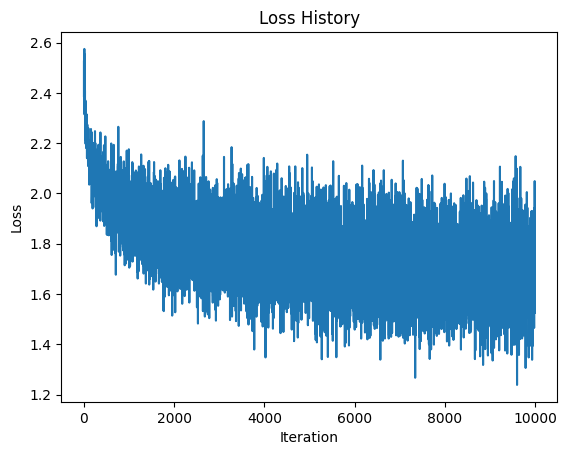

Training accuracy: 42.52%
Test accuracy: 41.98%


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100  # Hidden layer size (new layer with 100 nodes)
K = 10  # Output size (number of classes in CIFAR-10)

# Xavier Initialization for weights and biases as nn.Parameter
w1 = nn.Parameter(torch.randn(Din, H) * (1.0 / Din ** 0.5))    # Weights from input layer to hidden layer
b1 = nn.Parameter(torch.zeros(H))               # Biases for the hidden layer
w2 = nn.Parameter(torch.randn(H, K) * (1.0 / H ** 0.5))      # Weights from hidden layer to output layer
b2 = nn.Parameter(torch.zeros(K))               # Biases for the output layer

# Hyperparameters
iterations = 10
lr = 0.001  # Increased learning rate
loss_history = []
criterion = nn.CrossEntropyLoss()

# Use an optimizer with momentum and weight decay (L2 regularization)
optimizer = optim.SGD([w1, b1, w2, b2], lr=lr, momentum=0.9, weight_decay=1e-4)

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.view(inputs.size(0), -1)  # Flatten the inputs

        # Forward pass
        z1 = inputs.mm(w1) + b1
        h1 = torch.sigmoid(z1)
        outputs = h1.mm(w2) + b2

        # Compute Cross-Entropy Loss
        loss = criterion(outputs, labels)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        optimizer.zero_grad()  # Zero the gradients before backward pass
        loss.backward()
        optimizer.step()  # Update weights

    print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        inputs = inputs.view(inputs.size(0), -1)  # Flatten the inputs

        # Forward pass
        z1 = inputs.mm(w1) + b1
        h1 = torch.sigmoid(z1)
        outputs = h1.mm(w2) + b2
        predicted_train = torch.argmax(outputs, dim=1)

        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs = inputs.view(inputs.size(0), -1)  # Flatten the inputs

        # Forward pass
        z1 = inputs.mm(w1) + b1
        h1 = torch.sigmoid(z1)
        outputs = h1.mm(w2) + b2
        predicted_test = torch.argmax(outputs, dim=1)

        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


## Question 02

### LeNet-5 Model for MNIST Classification

This code implements the **LeNet-5** architecture using PyTorch to classify digits in the **MNIST dataset**. The model is trained for **10 epochs**, with both **training and test accuracies** reported.

- **Architecture**: LeNet-5 with two convolutional layers and three fully connected layers, using ReLU activations and max pooling.
- **Dataset**: MNIST, with images normalized and loaded in batches.
- **Optimizer and Loss**: Adam optimizer with learning rate `0.001` and Cross-Entropy Loss.
- **Training and Testing**: Training accuracy is displayed after each epoch, and the final test accuracy is reported after all 10 epochs.


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define the LeNet-5 architecture
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)  # Input: 1x28x28, Output: 6x28x28
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)  # Input: 6x28x28, Output: 16x24x24
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)  # 6x28x28 -> 6x14x14
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)  # 16x10x10 -> 16x5x5
        x = x.view(-1, 16 * 5 * 5)  # Flatten
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Instantiate the model, define the loss function and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Training Accuracy: {train_accuracy:.2f}%")

# Testing the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy after {num_epochs} epochs: {test_accuracy:.2f}%")


Epoch [1/10], Loss: 0.0957, Training Accuracy: 93.06%
Epoch [2/10], Loss: 0.0189, Training Accuracy: 98.03%
Epoch [3/10], Loss: 0.0064, Training Accuracy: 98.57%
Epoch [4/10], Loss: 0.0211, Training Accuracy: 98.93%
Epoch [5/10], Loss: 0.1250, Training Accuracy: 99.13%
Epoch [6/10], Loss: 0.0084, Training Accuracy: 99.19%
Epoch [7/10], Loss: 0.0049, Training Accuracy: 99.34%
Epoch [8/10], Loss: 0.0009, Training Accuracy: 99.42%
Epoch [9/10], Loss: 0.0745, Training Accuracy: 99.50%
Epoch [10/10], Loss: 0.0238, Training Accuracy: 99.56%
Test Accuracy after 10 epochs: 99.11%


## Question 03

In [8]:
# License: BSD
# Author: Sasank Chilamkurthy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   

In [9]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

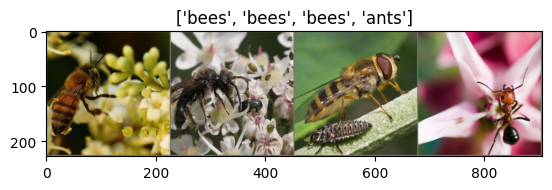

In [10]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [11]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path, weights_only=True))
    return model

In [12]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

### Finetuning the ConvNet

In [13]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Tuf/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:10<00:00, 4.63MB/s]


In [14]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5640 Acc: 0.7090
val Loss: 0.3570 Acc: 0.8431

Epoch 1/24
----------
train Loss: 0.4189 Acc: 0.8361
val Loss: 0.2211 Acc: 0.9150

Epoch 2/24
----------
train Loss: 0.4461 Acc: 0.7992
val Loss: 0.2596 Acc: 0.9020

Epoch 3/24
----------
train Loss: 0.6557 Acc: 0.7336
val Loss: 0.2772 Acc: 0.9020

Epoch 4/24
----------
train Loss: 0.4753 Acc: 0.7828
val Loss: 0.2954 Acc: 0.8758

Epoch 5/24
----------
train Loss: 0.4821 Acc: 0.8279
val Loss: 0.2793 Acc: 0.9020

Epoch 6/24
----------
train Loss: 0.3859 Acc: 0.8484
val Loss: 0.3092 Acc: 0.8824

Epoch 7/24
----------
train Loss: 0.3685 Acc: 0.8566
val Loss: 0.2260 Acc: 0.9216

Epoch 8/24
----------
train Loss: 0.3605 Acc: 0.8402
val Loss: 0.1982 Acc: 0.9346

Epoch 9/24
----------
train Loss: 0.2944 Acc: 0.8770
val Loss: 0.1897 Acc: 0.9412

Epoch 10/24
----------
train Loss: 0.2845 Acc: 0.8852
val Loss: 0.1959 Acc: 0.9412

Epoch 11/24
----------
train Loss: 0.2600 Acc: 0.9016
val Loss: 0.2027 Acc: 0.9477

Ep

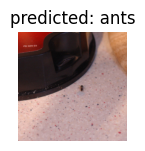

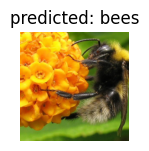

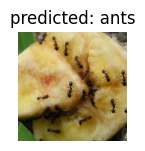

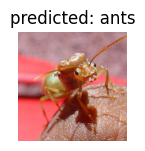

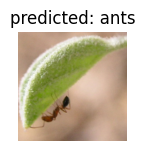

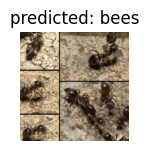

In [16]:
visualize_model(model_ft)

### ConvNet as fixed feature extractor

In [17]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [18]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)


Epoch 0/24
----------
train Loss: 0.5743 Acc: 0.7008
val Loss: 0.2814 Acc: 0.8627

Epoch 1/24
----------
train Loss: 0.5090 Acc: 0.7828
val Loss: 0.2996 Acc: 0.8693

Epoch 2/24
----------
train Loss: 0.4469 Acc: 0.7951
val Loss: 0.2030 Acc: 0.9281

Epoch 3/24
----------
train Loss: 0.4556 Acc: 0.8033
val Loss: 0.2395 Acc: 0.9281

Epoch 4/24
----------
train Loss: 0.4852 Acc: 0.7869
val Loss: 0.2216 Acc: 0.9346

Epoch 5/24
----------
train Loss: 0.7032 Acc: 0.7336
val Loss: 0.2057 Acc: 0.9216

Epoch 6/24
----------
train Loss: 0.5165 Acc: 0.7787
val Loss: 0.3131 Acc: 0.8889

Epoch 7/24
----------
train Loss: 0.3967 Acc: 0.8320
val Loss: 0.2105 Acc: 0.9281

Epoch 8/24
----------
train Loss: 0.2890 Acc: 0.8689
val Loss: 0.1859 Acc: 0.9477

Epoch 9/24
----------
train Loss: 0.3657 Acc: 0.8484
val Loss: 0.1625 Acc: 0.9542

Epoch 10/24
----------
train Loss: 0.3436 Acc: 0.8443
val Loss: 0.1927 Acc: 0.9346

Epoch 11/24
----------
train Loss: 0.3986 Acc: 0.8361
val Loss: 0.1873 Acc: 0.9281

Ep

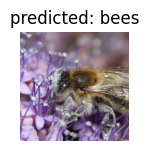

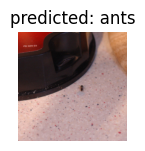

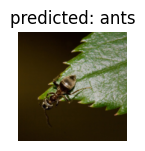

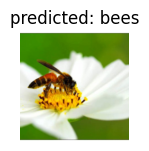

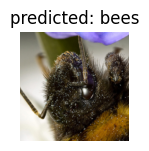

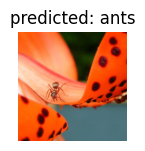

In [19]:
visualize_model(model_conv)

plt.ioff()
plt.show()

### Fine-Tuning:

- **Change the Final Layer**: Replace the original output layer of the pre-trained network (ResNet18) to match the number of classes in the new dataset (in this case, 2 classes for bees and ants).
- **Train the Entire Network**: All layers in the network (including the pre-trained layers) are updated to better fit the new dataset. This approach adjusts the network to the new task and allows the model to adapt previously learned features to the specific characteristics of the new data.
- **Requires Training**: The model undergoes training on the new dataset, updating weights across the entire network.

### Feature Extraction:

- **Change the Final Layer Only**: Just like in fine-tuning, the final layer is modified to classify into the new classes (2 classes).
- **Freeze All Other Layers**: The rest of the network (except for the new final layer) remains unchanged, retaining the weights learned from ImageNet.
- **Train Only the Final Layer**: The model trains only the last layer on the new dataset, without modifying the pre-trained layers. This makes the network act as a fixed feature extractor, where it applies the learned features from ImageNet directly to the new task.
- **Requires Minimal Training**: Only the final layer is trained, so the process is much faster and requires fewer resources.
